# Prediksi Kanker Payudara Jinak vs Ganas Berdasarkan Karakteristik Sel

## Data Understanding


### Sumber dataset

https://www.kaggle.com/datasets/schizzika/breast-cancer-data-winconsin-original/data

### Penjelasan Fitur dan Variabel

Dataset ini digunakan untuk memprediksi jenis kanker payudara, yaitu apakah jinak (benign) atau ganas (malignant), berdasarkan pengamatan morfologi sel dari sampel jaringan payudara. Data dikumpulkan melalui prosedur Fine Needle Aspiration (FNA), yaitu teknik pengambilan sampel dengan jarum halus yang umum digunakan dalam diagnosis kanker.

Setiap data merepresentasikan satu sampel jaringan yang dianalisis di bawah mikroskop. Proses penilaian dilakukan oleh ahli patologi berdasarkan karakteristik seluler yang terlihat secara visual. Nilai-nilai fitur diskalakan dalam rentang 1 hingga 10 untuk mencerminkan tingkat keparahan atau keabnormalan dari masing-masing karakteristik.

Dataset ini berasal dari hasil observasi medis yang dikumpulkan secara berkala oleh Dr. William H. Wolberg dari University of Wisconsin Hospitals, Madison.

Fitur-Fitur yang Digunakan:

1. Sample code number
   → Nomor identifikasi unik untuk setiap pasien atau sampel

2. Clump Thickness
   → Ketebalan kelompok sel. Clump yang lebih tebal sering mengindikasikan keganasan.

3. Uniformity of Cell Size
   → Keseragaman ukuran sel. Semakin tidak seragam, semakin tinggi kemungkinan kanker ganas.

4. Uniformity of Cell Shape
   → Keseragaman bentuk sel. Sel kanker sering kali berbentuk tidak teratur.

5. Marginal Adhesion
   → Kemampuan sel untuk saling menempel di tepi. Sel kanker biasanya kurang melekat.

6. Single Epithelial Cell Size
   → Ukuran sel epitel tunggal. Pembesaran sel ini bisa menjadi tanda keganasan.

7. Bare Nuclei
   → Inti sel yang terlihat jelas tanpa sitoplasma. Banyaknya inti yang tampak biasanya merupakan ciri kanker.

8. Bland Chromatin
   → Penampilan kromatin (materi genetik) dalam inti sel. Kromatin tidak merata adalah ciri keganasan.

9. Normal Nucleoli
   → Keberadaan nukleolus (struktur dalam inti sel). Nukleolus yang besar dan menonjol umum ditemukan pada sel kanker.

10. Mitoses
    → Jumlah sel yang sedang membelah. Mitosis tinggi mengindikasikan pertumbuhan sel yang cepat, ciri khas kanker.

11. Class (label)
    → Nilai target:

* `2` untuk jinak (benign)
* `4` untuk ganas (malignant)



### Visualisasi data

In [1]:
import pandas as pd
df_breastcancer = pd.read_csv('breast_cancer.csv')
df_breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [2]:
import pandas as pd


# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_breastcancer))
print("Visualisasi dataset breastcancer")
print(df_breastcancer.head())


Total baris dataset ini adalah = 683
Visualisasi dataset breastcancer
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mi

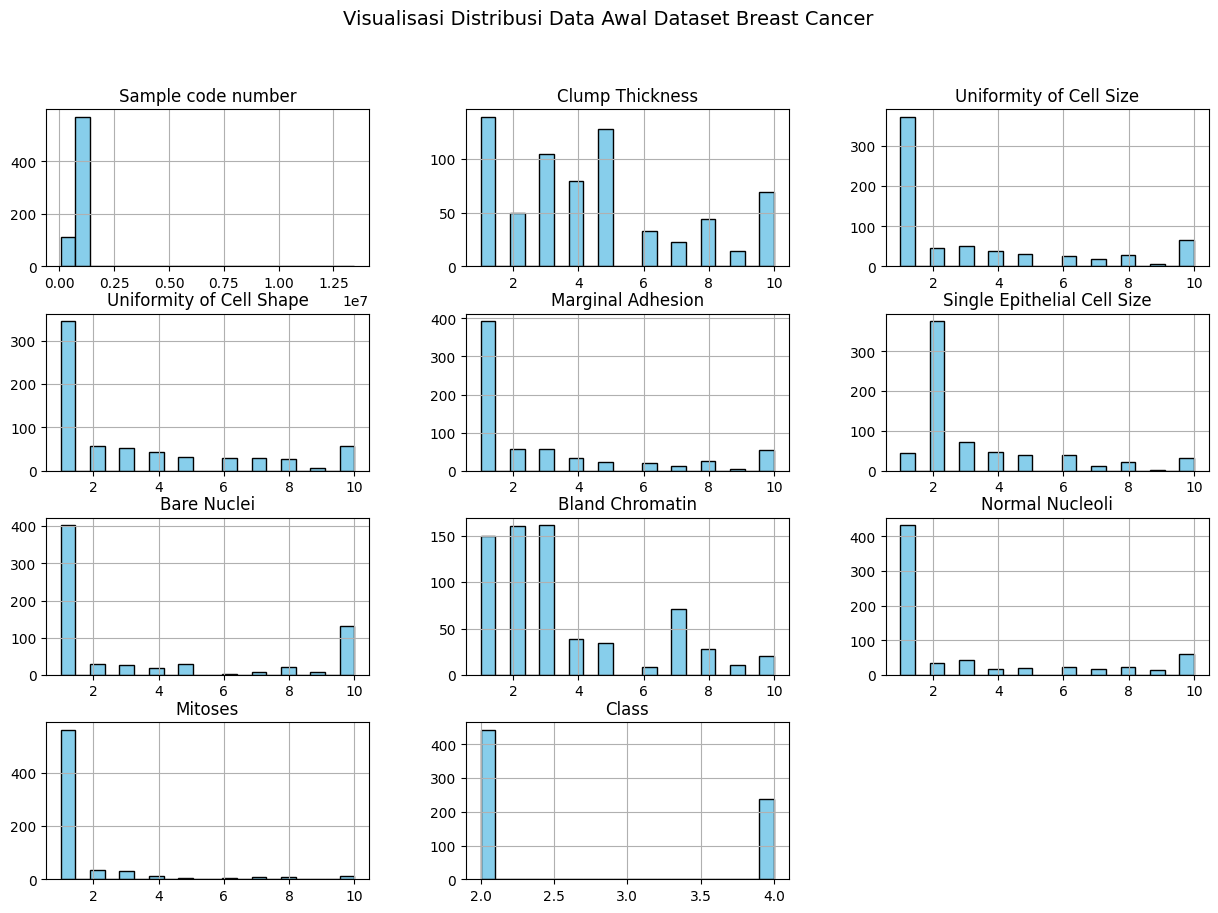

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# === 3. Visualisasi distribusi tiap kolom numerik ===
df_breastcancer.hist(figsize=(15,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Visualisasi Distribusi Data Awal Dataset Breast Cancer', fontsize=14)
plt.show()




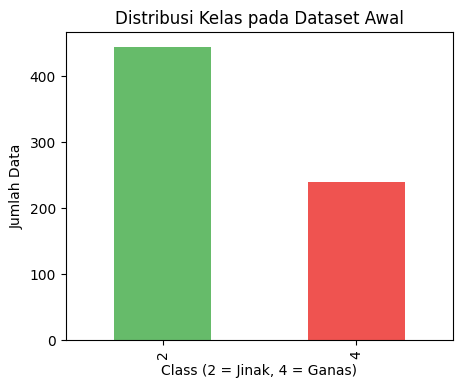

   Class  Jumlah
0      2     444
1      4     239


In [4]:
# === 4. Visualisasi distribusi label Class ===
plt.figure(figsize=(5,4))
df_breastcancer['Class'].value_counts().plot(kind='bar', color=['#66bb6a', '#ef5350'])
plt.title('Distribusi Kelas pada Dataset Awal')
plt.xlabel('Class (2 = Jinak, 4 = Ganas)')
plt.ylabel('Jumlah Data')
plt.show()

jumlah_kelas = df_breastcancer.groupby('Class').size().reset_index(name='Jumlah')
print(jumlah_kelas)

In [5]:
# # Simpan ke file CSV
# df_breastcancer.to_csv('datasetbreastcancer.csv', index=False)

## Preprocessing Data

### Transformasi data

Target yang sebelumnya berisi numerik diubah ke kategorikal, antara lain Jinak dan Ganas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Transformasi nilai pada kolom Class
df_breastcancer['Class'] = df_breastcancer['Class'].map({2: 'Jinak', 4: 'Ganas'})

print(df_breastcancer)

     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1        

### Penanganan Missing Value

Pada Tahap ini, kita melakukan pengecekan missing value dari setiap kolom

In [7]:
print("Apakah ada missing value di dataset?:", df_breastcancer.isnull().values.any())


Apakah ada missing value di dataset?: False


### Pengecekan Data Duplikat

In [8]:
# Mengecek jumlah baris yang duplikat
jumlah_duplikat = df_breastcancer.duplicated().sum()
print("Jumlah data duplikat:", jumlah_duplikat)

# Jika ingin langsung menampilkan data duplikat tanpa membuat variabel baru
print(
    df_breastcancer
    .loc[df_breastcancer.duplicated(keep=False)]
    .sort_values(by=df_breastcancer.columns.tolist())
)


Jumlah data duplikat: 8
     Sample code number  Clump Thickness  Uniformity of Cell Size  \
259              320675                3                        3   
264              320675                3                        3   
667              466906                1                        1   
668              466906                1                        1   
302              704097                1                        1   
324              704097                1                        1   
40              1100524                6                       10   
245             1100524                6                       10   
60              1116116                9                       10   
246             1116116                9                       10   
162             1198641                3                        1   
250             1198641                3                        1   
201             1218860                1                        1   
202       

In [9]:
# Hapus semua baris duplikat (menyisakan hanya satu baris unik)
df_breastcancerdup = df_breastcancer.drop_duplicates()

# Cek ulang untuk memastikan sudah bersih
print("Jumlah data setelah menghapus duplikat:", len(df_breastcancerdup))
print("Jumlah duplikat tersisa:", df_breastcancerdup.duplicated().sum())


Jumlah data setelah menghapus duplikat: 675
Jumlah duplikat tersisa: 0


### Pencarian Outlier

Pada tahap ini, saya melakukan pencarian outlier dari setiap kolom

In [10]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# 1️⃣ Pilih kolom numerik (selain 'Class')
numeric_cols = [col for col in df_breastcancerdup.columns
                if df_breastcancerdup[col].dtype in ['int64', 'float64'] and col != 'Class']

# 2️⃣ Terapkan LOF langsung pada dataset asli
lof = LocalOutlierFactor(n_neighbors=200, contamination=0.05)
df_breastcancerdup.loc[:, 'LOF_Outlier'] = lof.fit_predict(df_breastcancerdup[numeric_cols])

# 3️⃣ Ambil baris yang terdeteksi outlier langsung dari dataset asli
outlier_rows = df_breastcancerdup.loc[df_breastcancerdup['LOF_Outlier'] == -1]

# 4️⃣ Hitung jumlah nilai ekstrem (berdasarkan IQR) di tiap kolom numerik
outlier_info = {}
for col in numeric_cols:
    Q1 = df_breastcancerdup[col].quantile(0.25)
    Q3 = df_breastcancerdup[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    count_outliers = ((outlier_rows[col] < lower) | (outlier_rows[col] > upper)).sum()
    if count_outliers > 0:
        outlier_info[col] = count_outliers

# 5️⃣ Urutkan hasil dari kolom dengan outlier terbanyak
outlier_info_sorted = dict(sorted(outlier_info.items(), key=lambda x: x[1], reverse=True))

# 6️⃣ Cetak hasil akhir
print("Kolom dengan outlier terbanyak berdasarkan LOF:")
for col, count in outlier_info_sorted.items():
    print(f"{col}: {count} outlier")


Kolom dengan outlier terbanyak berdasarkan LOF:
Sample code number: 24 outlier
Mitoses: 11 outlier
Marginal Adhesion: 6 outlier
Single Epithelial Cell Size: 3 outlier
Normal Nucleoli: 3 outlier
Bland Chromatin: 1 outlier


C:\Users\Asus\AppData\Local\Temp\ipykernel_21336\4094112354.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_breastcancerdup.loc[:, 'LOF_Outlier'] = lof.fit_predict(df_breastcancerdup[numeric_cols])


### Normalisasi data

Dataset dinormalisasi menggunakan StandarScaler dari library sklearn

In [11]:
from sklearn.preprocessing import StandardScaler

# Tentukan kolom yang akan distandarisasi
cols_to_scale = ['Mitoses', 'Single Epithelial Cell Size', 'Marginal Adhesion', 'Normal Nucleoli', 'Bare Nuclei']

# Inisialisasi scaler
scaler = StandardScaler()

# Terapkan standarisasi langsung pada DataFrame asli menggunakan .loc
df_breastcancerdup.loc[:, cols_to_scale] = scaler.fit_transform(df_breastcancerdup[cols_to_scale])


C:\Users\Asus\AppData\Local\Temp\ipykernel_21336\2156665431.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.3491417  -0.3491417  -0.3491417  -0.3491417  -0.3491417  -0.3491417
 -0.3491417  -0.3491417   1.95008414 -0.3491417  -0.3491417  -0.3491417
 -0.3491417  -0.3491417   1.37527768 -0.3491417  -0.3491417  -0.3491417
  0.22566476 -0.3491417   1.37527768 -0.3491417  -0.3491417  -0.3491417
 -0.3491417  -0.3491417  -0.3491417  -0.3491417  -0.3491417  -0.3491417
 -0.3491417   0.80047122 -0.3491417  -0.3491417  -0.3491417  -0.3491417
 -0.3491417  -0.3491417  -0.3491417   0.22566476  0.80047122 -0.3491417
 -0.3491417   0.22566476 -0.3491417  -0.3491417  -0.3491417   0.22566476
  1.95008414 -0.3491417   0.22566476  3.09969705 -0.3491417  -0.3491417
 -0.3491417   1.37527768 -0.3491417  -0.3491417  -0.3491417  -0.3491417
 -0.3491417  -0.3491417  -0.3491417   4.82411643 -0.3491417  -0.3491417
  3.67450351 -0.349141

### Visualisasi data setelah preprocessing

Berikut adalah visualisasi data setelah tahap preprocessing

In [12]:
import pandas as pd

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_breastcancerdup))
print("Visualisasi dataset kanker payudara setelah target diubah menjadi kategorikal")
print(df_breastcancerdup)


Total baris dataset ini adalah = 675
Visualisasi dataset kanker payudara setelah target diubah menjadi kategorikal
     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single

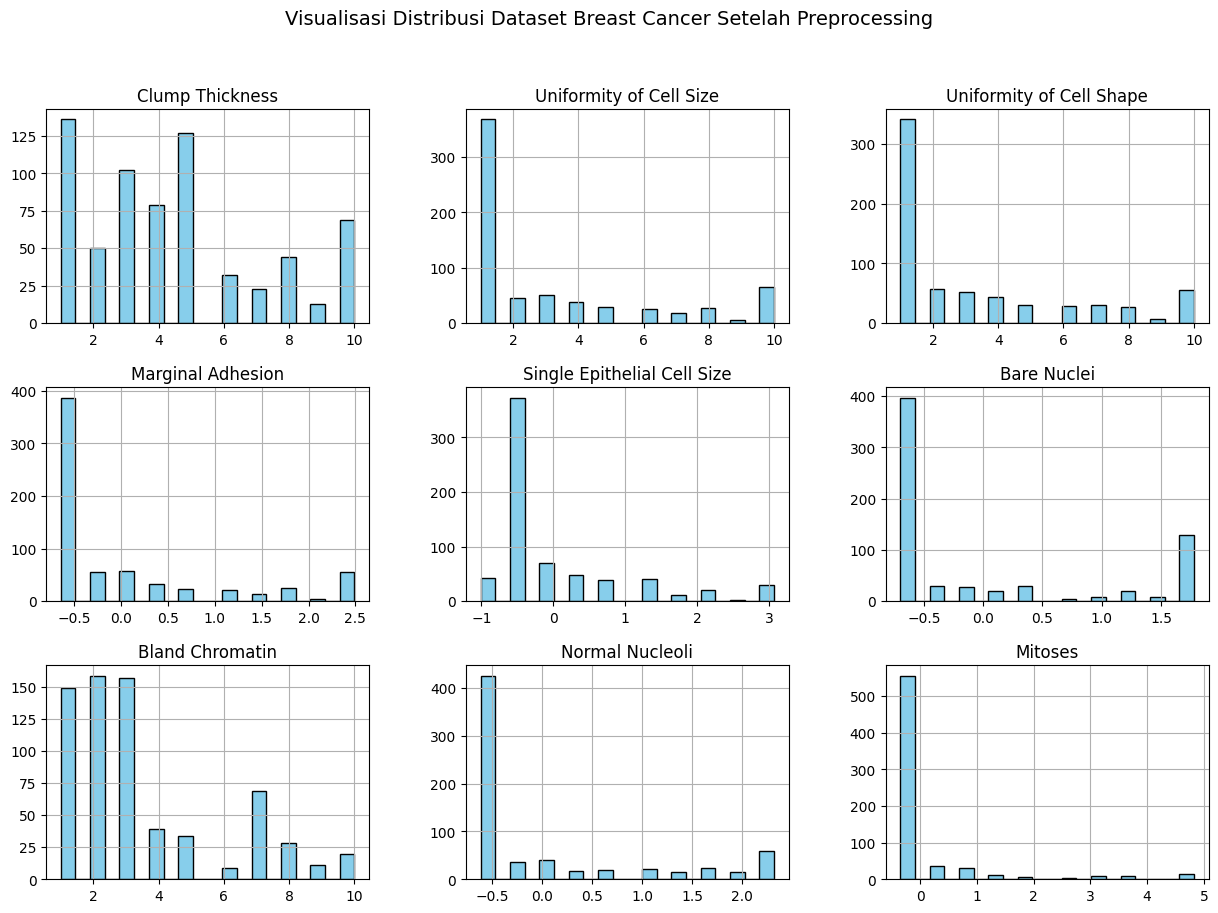

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# === 2. Visualisasi distribusi tiap kolom numerik ===
# (kecuali kolom kategori seperti 'Class' atau 'LOF_Outlier')
numeric_cols = df_breastcancerdup.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Class', 'LOF_Outlier', 'Sample code number']]

# Plot histogram
df_breastcancerdup[numeric_cols].hist(
    figsize=(15, 10),
    bins=20,
    color='skyblue',
    edgecolor='black'
)
plt.suptitle('Visualisasi Distribusi Dataset Breast Cancer Setelah Preprocessing', fontsize=14)
plt.show()


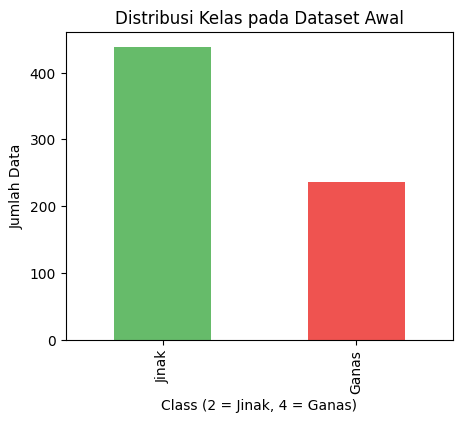

   Class  Jumlah
0  Ganas     236
1  Jinak     439


In [14]:
# === 4. Visualisasi distribusi label Class ===
plt.figure(figsize=(5,4))
df_breastcancerdup['Class'].value_counts().plot(kind='bar', color=['#66bb6a', '#ef5350'])
plt.title('Distribusi Kelas pada Dataset Awal')
plt.xlabel('Class (2 = Jinak, 4 = Ganas)')
plt.ylabel('Jumlah Data')
plt.show()

jumlah_kelas = df_breastcancerdup.groupby('Class').size().reset_index(name='Jumlah')
print(jumlah_kelas)

In [15]:
# # Simpan ke file CSV
# df_breastcancerdup.to_csv('datasetbreastcategorical.csv', index=False)

### Split data

Dataset dipisahkan menjadi 2 yaitu data testing 20% dan data traning 80%

In [16]:
from sklearn.model_selection import train_test_split

# 1. Misahkan fitur (X) dan target (y)
X = df_breastcancerdup.drop(['Sample code number','Class','LOF_Outlier'], axis=1, errors='ignore')  # Fitur
y = df_breastcancerdup['Class']  # Target

# 2. Split menjadi data latih dan uji (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% untuk data uji
    random_state=42,     # Supaya hasil konsisten
    stratify=y           # Menjaga proporsi kelas seimbang
)

# 3. Cek jumlah data
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


Jumlah data latih: 540
Jumlah data uji: 135


### SMOTE

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# === Sebelum SMOTE ===
print("Distribusi sebelum SMOTE:", Counter(y_train))

# === Terapkan SMOTE ===
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# === Setelah SMOTE ===
print("Distribusi sesudah SMOTE:", Counter(y_train_sm))


Distribusi sebelum SMOTE: Counter({'Jinak': 351, 'Ganas': 189})
Distribusi sesudah SMOTE: Counter({'Jinak': 351, 'Ganas': 351})


## Modelling

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

Akurasi: 0.9851851851851852

=== Classification Report ===
              precision    recall  f1-score   support

       Ganas       0.98      0.98      0.98        47
       Jinak       0.99      0.99      0.99        88

    accuracy                           0.99       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.99      0.99      0.99       135



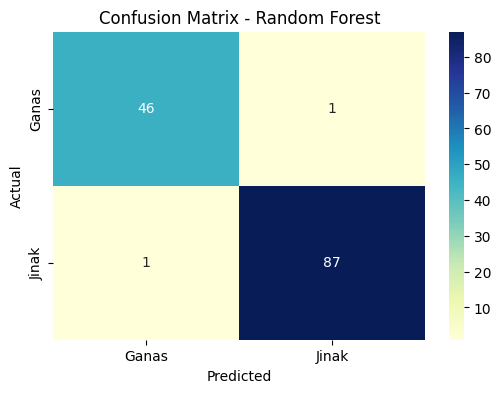

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Latih model Random Forest ===
rf = RandomForestClassifier(
    n_estimators=100,       # jumlah pohon (bisa diubah)
    random_state=42,        # agar hasil konsisten
    max_depth=None,         # kedalaman pohon (bisa diatur)
    n_jobs=-1               # gunakan semua core CPU
)
rf.fit(X_train_sm, y_train_sm)

# === 8. Evaluasi ===
y_pred = rf.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_, cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Akurasi: 0.9777777777777777

=== Classification Report ===
              precision    recall  f1-score   support

       Ganas       0.94      1.00      0.97        47
       Jinak       1.00      0.97      0.98        88

    accuracy                           0.98       135
   macro avg       0.97      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135



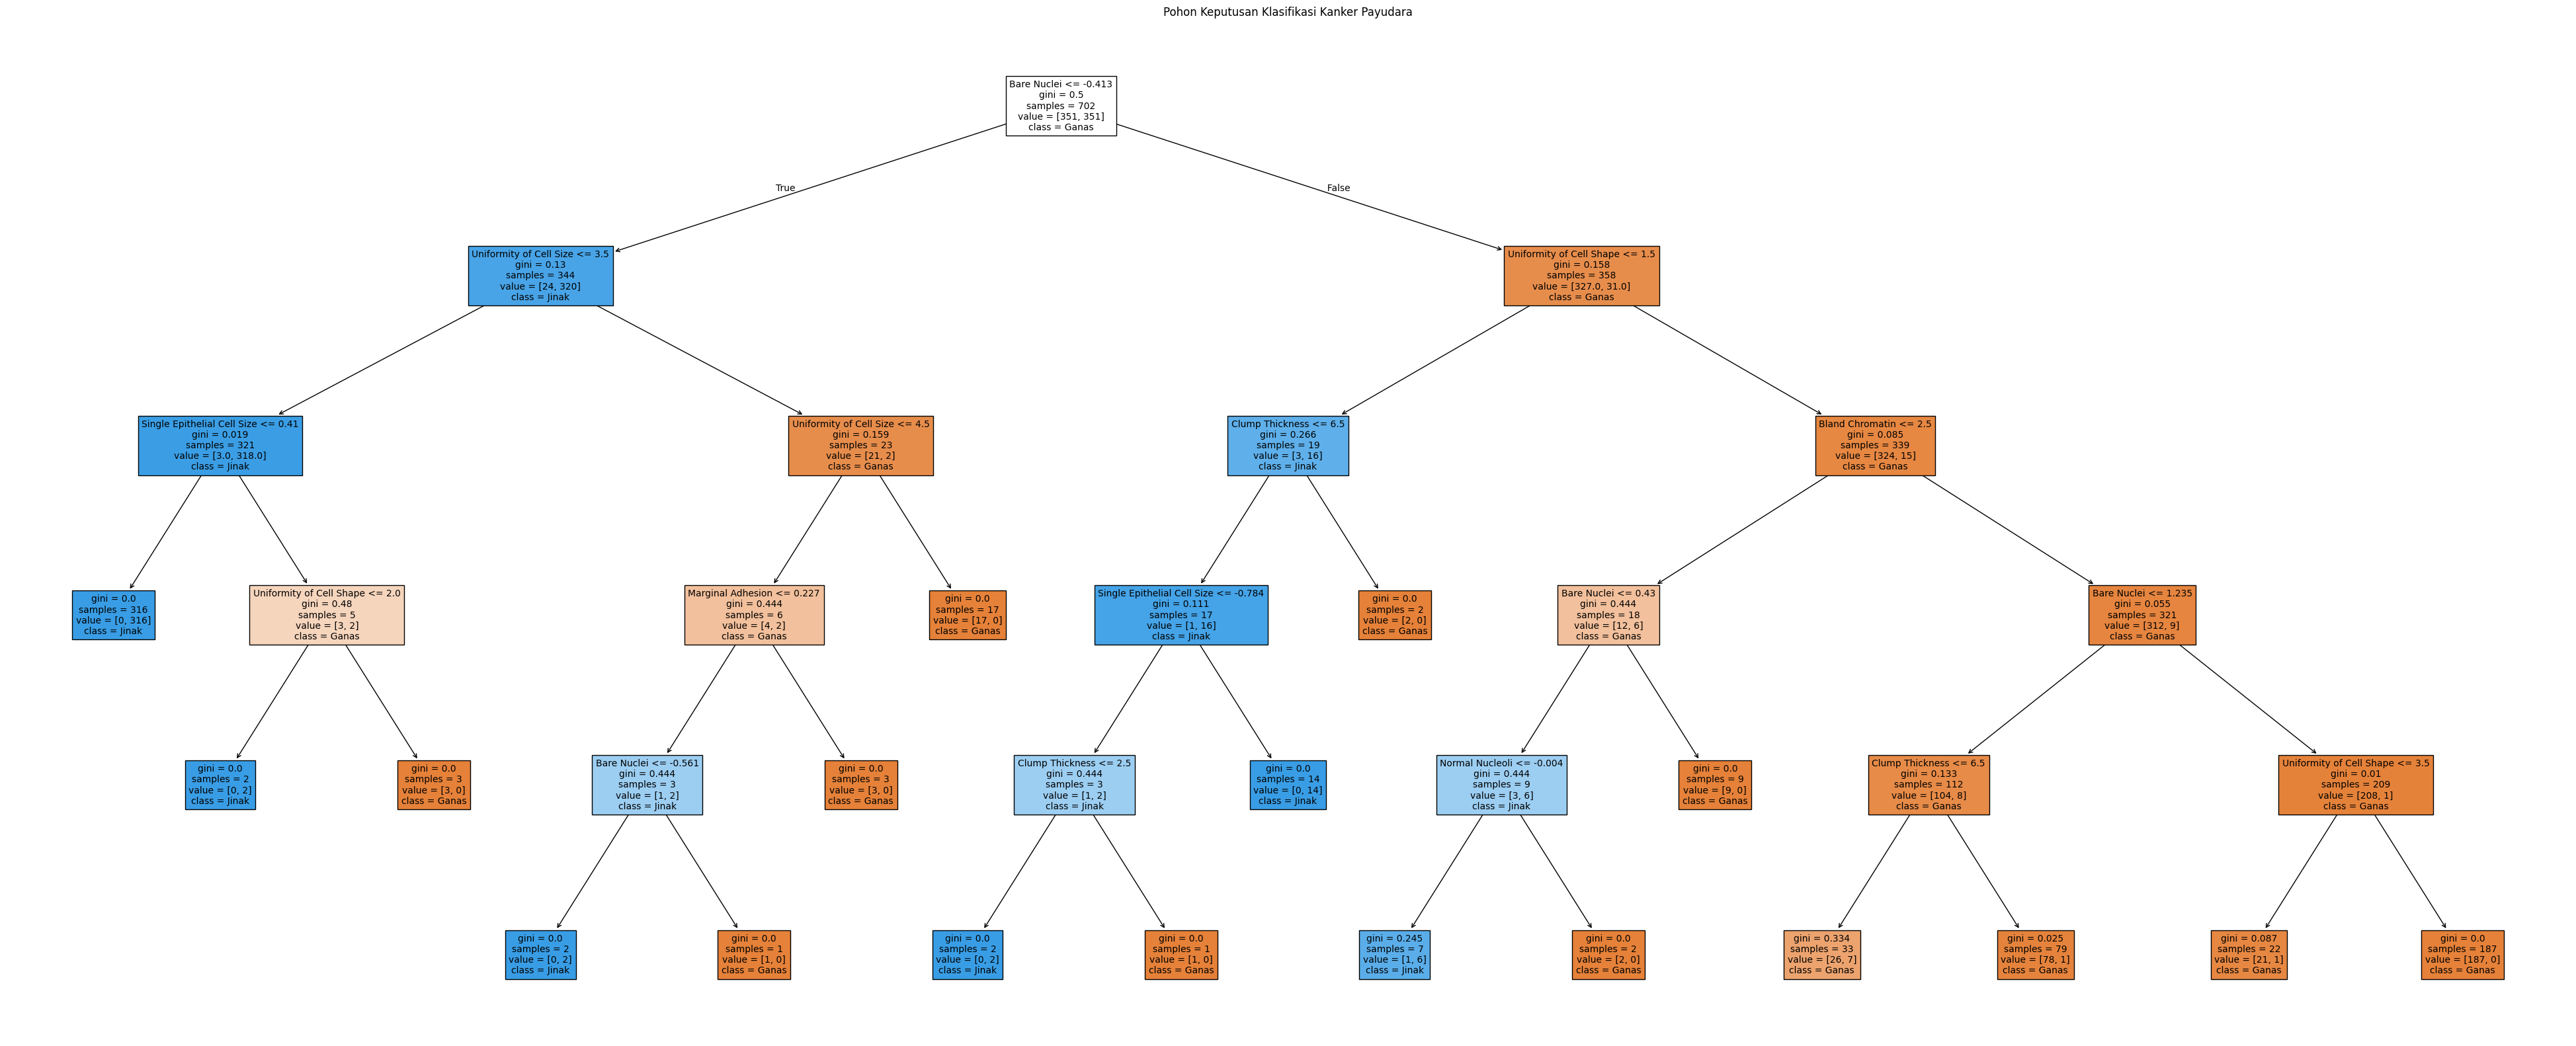

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 7. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train_sm, y_train_sm)

# === 8. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Visualisasi Struktur Pohon ===
plt.figure(figsize=(50, 20))
plot_tree(clf, feature_names=X.columns, class_names=list(map(str, clf.classes_)), filled=True, fontsize=10)
plt.title("Pohon Keputusan Klasifikasi Kanker Payudara")
plt.show()


Akurasi: 0.9629629629629629

=== Classification Report ===
              precision    recall  f1-score   support

       Ganas       0.94      0.96      0.95        47
       Jinak       0.98      0.97      0.97        88

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



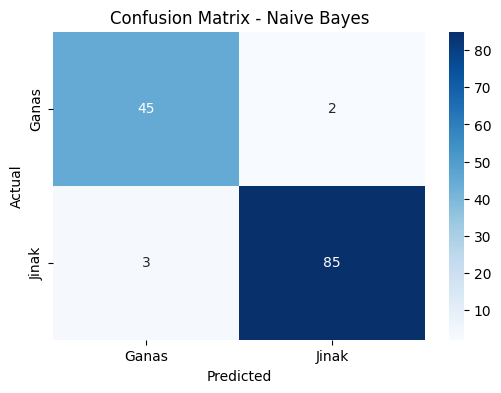

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Latih model Naive Bayes ===
gnb = GaussianNB()
gnb.fit(X_train_sm, y_train_sm)

# === 8. Evaluasi hasil prediksi ===
y_pred = gnb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=gnb.classes_, yticklabels=gnb.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


Akurasi: 0.9777777777777777

=== Classification Report ===
              precision    recall  f1-score   support

       Ganas       0.98      0.96      0.97        47
       Jinak       0.98      0.99      0.98        88

    accuracy                           0.98       135
   macro avg       0.98      0.97      0.98       135
weighted avg       0.98      0.98      0.98       135



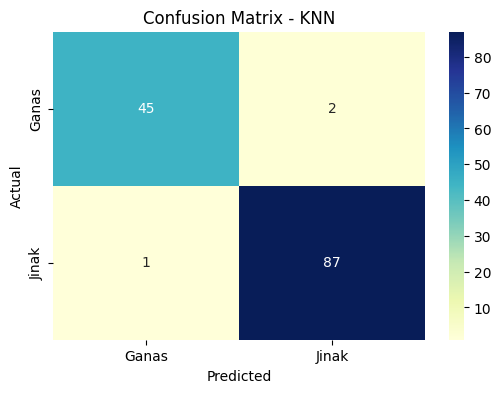

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Latih model KNN ===
knn = KNeighborsClassifier(n_neighbors=5)  # kamu bisa ubah k sesuai kebutuhan
knn.fit(X_train_sm, y_train_sm)

# === 8. Evaluasi ===
y_pred = knn.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=knn.classes_, yticklabels=knn.classes_, cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


### Menyimpan model

In [23]:
import joblib

# === Simpan model ke file .pkl menggunakan joblib ===
joblib.dump(rf, 'model_rf.pkl')

print("Model Random Forest berhasil disimpan ke 'model_rf.pkl'")


Model Random Forest berhasil disimpan ke 'model_rf.pkl'


### Integrasi Model Dengan Web

* Install library Streamlit, dengan menjalankan perintah “pip install streamlit” pada terminal.
* membuat file berekstensi .py, misal prediksikankerpayudara.py.
* didalam prediksikankerpayudara.py saya panggil model yang telah disimpan.
* setelah itu saya membuat tampilan informasi keterangan tentang inputan dan hasil evaluasi. selain itu saya juga membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi. untuk tampilan saya masukkan code nya didalam file app.py juga, karena dimudahkan oleh library streamlit.

* Source code yang telah saya buat dapat diakses melalui link berikut :
https://github.com/Zuzun1ch/deploy

### Hasil Web

Link web: https://prediksikankerpayudarajinakvsganas.streamlit.app/

Berikut adalah hasil dari webnya. Terdapat form untuk memasukkan fitur-fitur yang nantinya akan diprediksi.

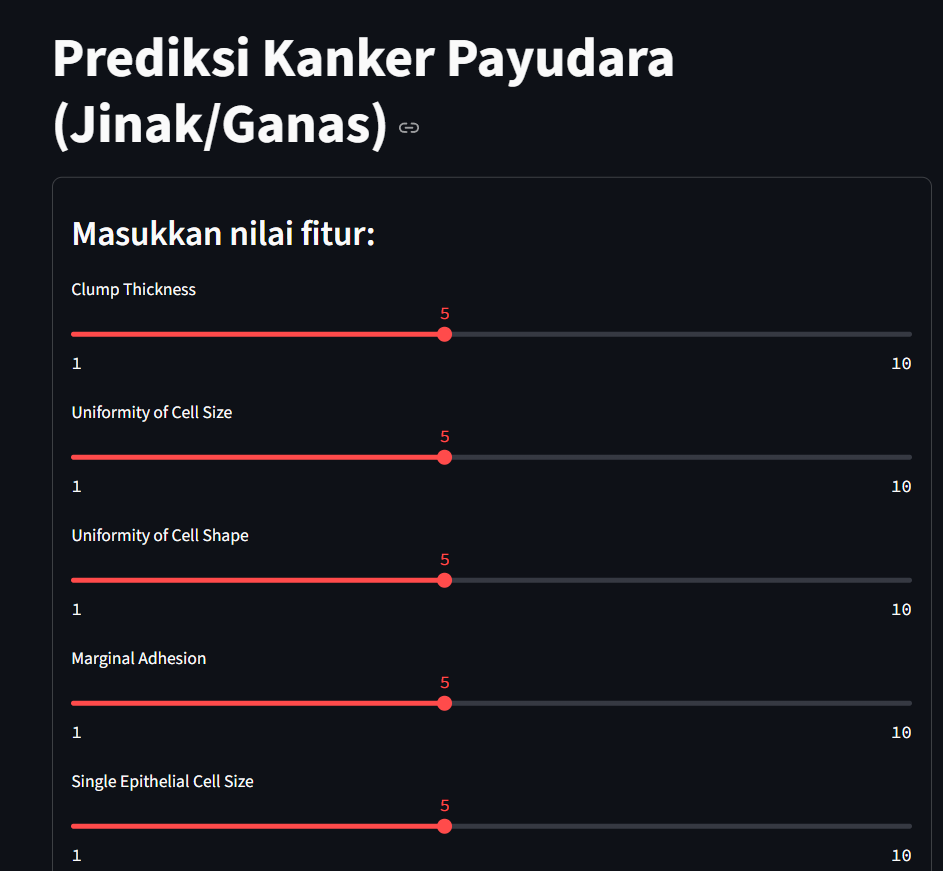

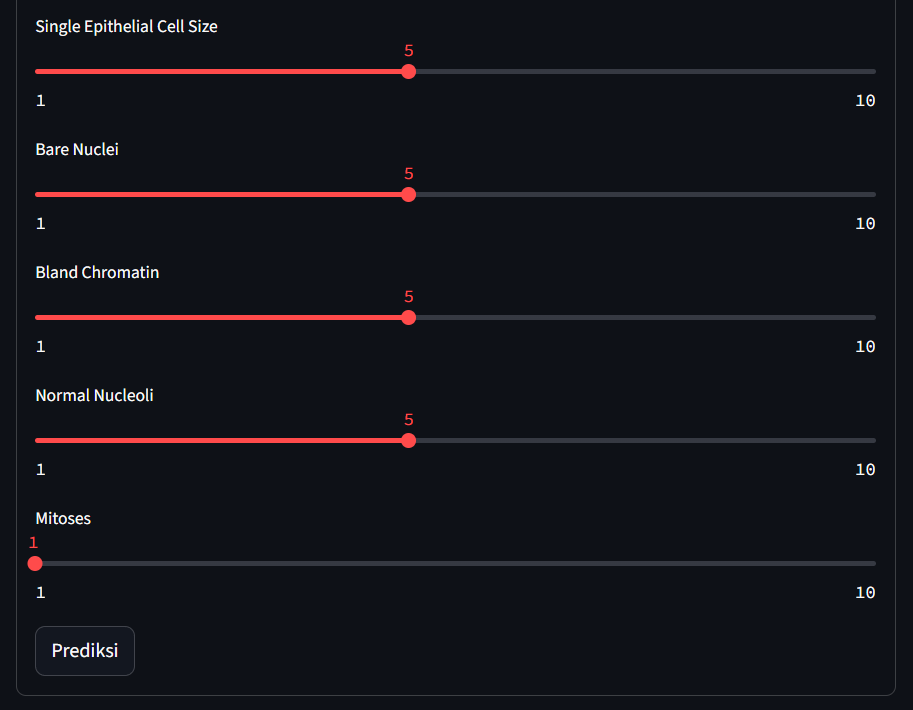

Dan ini contoh hasil prediksinya:

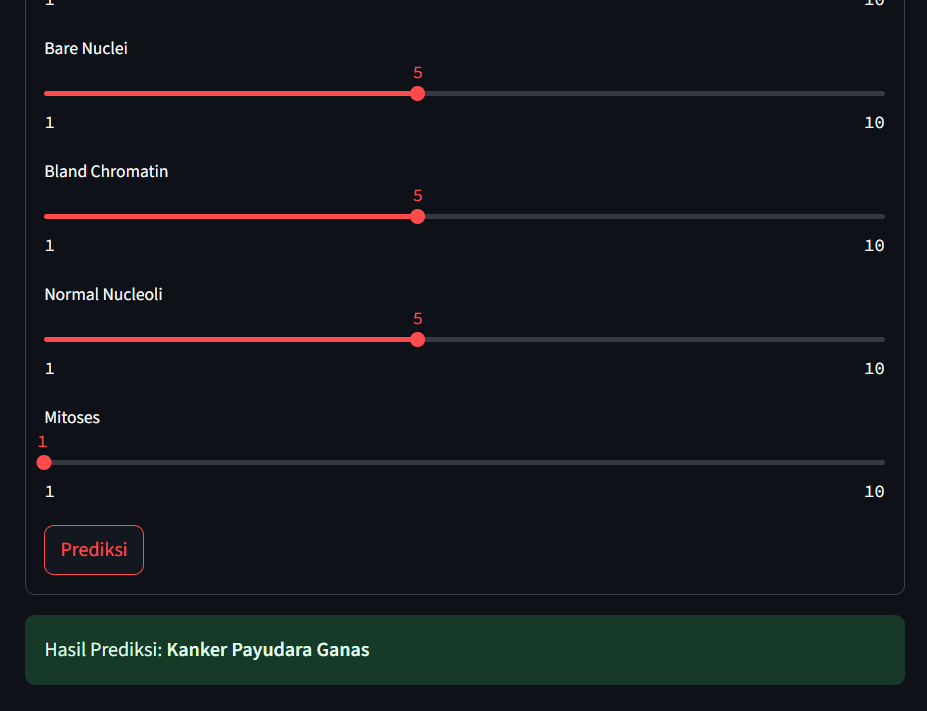